Cálculo de distancia entre coordenadas

In [ ]:
import math

Fórmula de Harvesine

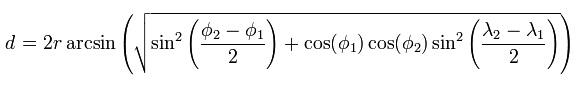

In [ ]:
def cdCoord(la1,lo1,la2,lo2):
  RT=6371
  Dla=la2-la1
  Dlo=lo2-lo1

  rla1=math.radians(la1)
  rla2=math.radians(la2)
  rdla=math.radians(Dla/2)
  rdlo=math.radians(Dlo/2)
  sla=math.sin(rdla)
  slo=math.sin(rdlo)
  
  p1=sla**2
  p2=math.cos(rla1)*math.cos(rla2)*(slo**2)
  fc=math.sqrt(p1+p2)
  d=2*RT*math.asin(fc)

  return d

In [ ]:
cla1=-12.09952
clo1=-76.98974
cla2=-12.09989
clo2=-76.98911
D=cdCoord(cla1,clo1,cla2,clo2)
strd="La distancia es: "+str(round(D,5))+" Km"
print(strd)

La distancia es: 0.0799 Km


Para nuestro formato de (latitud,longitud)

In [ ]:
def Dcoord2(C1,C2):
  la1=C1[0]
  lo1=C1[1]
  la2=C2[0]
  lo2=C2[1]
  D=cdCoord(la1,lo1,la2,lo2)
  return D


In [ ]:
c1=(-12.09952,-76.98974)
c2=(-12.09989,-76.98911)
Dcoord2(c1,c2)

0.07990274891193774

Función para hallar peso de aristas

In [ ]:
import random 

In [ ]:
def rangoTrafico():
  rtraf=[]
  madrugada=0
  mañana=7
  tarde=13
  noche=20
  for i in range(24):
    if (i>=madrugada and i<mañana):
      rtraf.append(random.uniform(0.3,0.9))
    elif (i>=mañana and i<tarde):
      rtraf.append(random.uniform(0.2,0.6))
    elif (i>=tarde and i<noche):
      rtraf.append(random.uniform(0.9,1.5))
    else:
      rtraf.append(random.uniform(1.1,1.3))
  return rtraf

def hallarPeso(longitud, hora):
  Traf=rangoTrafico()
  P=0

  if(hora>=0 and hora<=23):
    P=longitud+longitud*Traf[hora]
  else:
    if(hora>=24):
      P=hallarPeso(longitud,hora-24)
    if(hora<0):
      P=hallarPeso(longitud,hora+24)
  return P


In [ ]:
c1=(-12.09952,-76.98974)
c2=(-12.09989,-76.98911)
D=Dcoord2(c1,c2)
for i in range(25):
  P=hallarPeso(D,i)
  strd=str(i)+" horas: El peso de la arista es: "+ str(round(P,3))
  print(strd)

0 horas: El peso de la arista es: 0.136
1 horas: El peso de la arista es: 0.12
2 horas: El peso de la arista es: 0.108
3 horas: El peso de la arista es: 0.105
4 horas: El peso de la arista es: 0.14
5 horas: El peso de la arista es: 0.127
6 horas: El peso de la arista es: 0.11
7 horas: El peso de la arista es: 0.108
8 horas: El peso de la arista es: 0.127
9 horas: El peso de la arista es: 0.113
10 horas: El peso de la arista es: 0.12
11 horas: El peso de la arista es: 0.115
12 horas: El peso de la arista es: 0.099
13 horas: El peso de la arista es: 0.165
14 horas: El peso de la arista es: 0.162
15 horas: El peso de la arista es: 0.189
16 horas: El peso de la arista es: 0.175
17 horas: El peso de la arista es: 0.187
18 horas: El peso de la arista es: 0.175
19 horas: El peso de la arista es: 0.175
20 horas: El peso de la arista es: 0.172
21 horas: El peso de la arista es: 0.181
22 horas: El peso de la arista es: 0.175
23 horas: El peso de la arista es: 0.175
24 horas: El peso de la arista

<h7>Para hallar el camino más corto usaremos el algoritmo de Kruskal

In [1]:
class DisjointSet:
    def __init__(self, n):
        self.s = [-1]*n

    def find(self, a):
        if self.s[a] < 0:
            return a
        parent = self.find(self.s[a])
        self.s[a] = parent
        return parent

    def sameset(self, a, b):
        return self.find(a) == self.find(b)

    def union(self, a, b):
        if self.sameset(a, b):
            return
        a = self.find(a)
        b = self.find(b)
        if -self.s[a] > -self.s[b]:
            self.s[a] += self.s[b]
            self.s[b] = a
        else:
            self.s[b] += self.s[a]
            self.s[a] = b

In [2]:
def kruskal(G):
  n=len(G)
  edges=[(w,u,v) for u in range(n) for v,w in G[u]]
  edges.sort()
  edges=list(reversed(edges))
  T=[]
  ds=DisjointSet(n)
  links=0
  while len(T)<n-1:
    _,u,v=edges.pop()
    if not ds.sameset(u,v):
      ds.union(u,v)
      links+=1
      T.append((u,v))
    if links==n-1: break
  return T